# Minimum Distance

Given points $p,l,u \in \mathbb{R}^k$ and a hyperrectangle $R=[l,u] = \{v \in \mathbb{R}^k \mid l_i \leq v_i \leq u_i~\forall~i = 1,\ldots,k\}$. Derive a lower-bound distance function $\text{MinDist}_{d}$ for all of the distance functions $d$ below. Your lower-bound distance function has to fulfill the following requirements:

1. $\text{MinDist}_{d}(p,R) \leq d(p,s)~\forall~s \in R$
1. If $l = u$, then $\text{MinDist}_{d}(p,R) = d(p,l)$
1. $l=u$ can not be handled as a special case
1. Your $\text{MinDist}_{d}$ has to be given in closed form
1. Your $\text{MinDist}_{d}$ may sum/multiply over at most $O(n)$ terms
1. It does not suffice to just scale $d$

Prove that your $\text{MinDist}_{d}$ is correct.

*Hint:* We do *not* demand $\text{MinDist}_{d}(p,R) = \min_{s\in R} \; d(p,s)$, except when $u=l$.

The intended solutions are simple, yet provide good enough bounds for many situations.

a) Minkowski $L_p$ distances (for all $p\geq 1$):
$$d_{L_p}(x,y) := \left(\sum_{i=1}^d |x_i-y_i|^p \right)^{1/p}$$

#### TODO

Minkowski ist min, wenn jeder Summand minimal wird.

Um eine untere Schranke für die Distanz zu erhalten überprüfen wir jede Komponenten. Ist diese innerhalb unserer Rechteckbeschränkung wird der Summand auf 0 gesetzt.

Wir nehmen die kürzeste Disatnz zur oberen oder unteren Schranke, je nachdem welche näher liegt, wenn der Punkt außerhalb ist.

$\delta(x_i,l_i,u_i)=\text{max}[0,l_i-x_i,x_i-u_i]$

$\text{MinDist}_{d_Lp}(x,[l,u])=\left(\sum_{i=1}^k \delta(x_i,l_i,u_i)^p\right)^{1/p}$

#### Auf Korrektheit überprüfen

$\delta(x_i,l_i,u_i)=\text{max}[0,l_i-x_i,x_i-u_i] \leq |s_i-p_i|$

Erstens: $l_i \leq x_i \leq u_i$:

$\text{max}[0,l_i-x_i,x_i-u_i]=0\leq |s_i-x_i|$

Zweitens $p_i\leq l_i$:

Wir wissen $x_i\leq l_i\leq s_i$

$\text{max}[0,l_i-x_i,x_i-u_i] = l_i-x_i=s_i-(s_i-l_i)-x_i\leq s_i-x_i=|s_i-x_i|$

Weil $l_i \leq s_i$ durch Definition

Drittens $u_i \leq x_i$:

Wir wissen $s_i \leq u_i \leq x_i$

$\text{max}[0,l_i-x_i,x_i-u_i] = x_i-u_i=x_i-(u_i-s_i)-x_i\leq s_i-x_i = |s_i-x_i|$

$s_i \leq u_i$

#### Auf u = l prüfen

$\text{MinDist}_{d_Lp}(x,[l,u])=\left(\sum_{i=1}^k \text{max}[0,l_i-x_i,x_i-u_i]^p\right)^{1/p}=\left(\sum_{i=1}^k |l_i-x_i|^p\right)^{1/p}$

b) Canberra distance (you may assume all coordinates to be $>0$):
$$d_{\text{Canberra}}(x,y) := \sum_{i=1}^d \frac{|x_i - y_i|}{|x_i|+|y_i|}$$

#### TODO

$|x_i-y_i|$ minimal und $|x_i|+|y_i|$ maximal

Deswegen ersetzen wir

$|x_i-y_i|$ mit $\delta(x_i,l_i,u_i)$

$|x_i|+|y_i|$ mit $|x_i|+\text{max}[|u_i|,|l_i|]$

Für Korrektheit überprüfe $|x_i|+\text{max}[|u_i|,|l_i|]\geq |s_i|+|x_i|$

Dies ist deutlich, weil $l_i\leq s_i \leq u_i$

c) Cosine distance (you may assume all coordinates to be $\geq 0$ and all vectors $\Vert x \Vert>0$):
$$d_{\text{Cosine}}(x,y) := 1 - \frac{x \cdot y}{\Vert x \Vert\cdot\Vert y \Vert}$$

#### TODO

$||y||$ muss minimiert werden und $x\cdot y$ maximieren.

$\mu(l_i,u_i) = 0\;\;if\;u_i\cdot l_i < 0$

$\mu(l_i,u_i) = \text{min}[|l_i|,|u_i|]\;\;else$

und

$||y||=\left(\sum_{i=1}^k\mu(l_i,u_i)^2\right)^{1/2}$

Für $x\cdot y=\sum x_iy_i$

$\nu(x_i,l_i,u_i) = x_i\cdot l_i \;\; if \;x_i<0$

$\nu(x_i,l_i,u_i) = x_i\cdot u_i \;\; else$

$\text{MinDist}_{d_{cosine}}(x,[l,u])=1-\left(\frac{\sum_{i=1}^k \nu(x_i,l_i,u_i)}{||x||\cdot \left(\sum_{i=1}^k\mu(l_i,u_i)^2\right)^{1/2}}\right)$

#### Korrektheit

$\frac{\sum_{i=1}^k \nu(x_i,l_i,u_i)}{||x||\cdot \left(\sum_{i=1}^k\mu(l_i,u_i)^2\right)^{1/2}}\geq\frac{x \cdot y}{\Vert x \Vert\cdot\Vert y \Vert}$

$1.\mu(l_i,u_i)\leq |s_i|$

$2.\nu(x_i,l_i,u_i)\geq x_i\cdot s_i$

##### Zu 1.

da $|s_i| \geq 0$ ist es wahr wenn $u_i\cdot l_i <0$

Weil $l_i\leq s_i \leq u_i$ ist $\text{min}[|l_i|,|u_i|]\leq s_i$

##### Zu 2.

Wenn $x_i<0$, $\bar x_i = -x_i >0$

$\nu(x_i,l_i,u_i)=x_i\cdot l_i=x_i\cdot (s_i-(s_i-l_i))=-\bar x_i\cdot s_i+\bar x_i\cdot(s_i-l_i)\geq -\bar x_i \cdot s_i = x_i\cdot s_i$

Wenn $x_i>0$

$\nu(x_i,l_i,u_i)=x_i\cdot u_i=x_i\cdot (s_i+(u_i-s_i))= x_i\cdot s_i+ x_i\cdot(u_i-s_i)\geq x_i \cdot s_i$

# Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
p_names = ['A','B','C','D','E','F']
points = pd.DataFrame([
        [1.5,1.5],
        [1,1],
        [5.5,4.5],
        [3,4],
        [3,3.5],
        [4,4]
    ], columns=['x1','x2'], index=p_names)

distances = pd.DataFrame([
        [np.linalg.norm(points.loc[p1]-points.loc[p2]) for p2 in p_names]
        for p1 in p_names
    ], columns=p_names, index=p_names)

a) Recall the example for hierarchical clustering from the lecture. Give the Dendrogram of a hierarchical clustering using the AGNES algorithm with single-linkage distance. Give all intermediate steps and the corresponding distance matrices.

*Hint:* You do not need to evaluate the Lance-Williams formula explicitly, but use the single-linkage distance directly.

In [2]:
from plotly import graph_objects as go
fig = go.Figure(layout=go.Layout(xaxis=dict(range=[0,6]),yaxis=dict(range=[0,5])))
fig.add_trace(go.Scatter(
    x=points['x1'],
    y=points['x2'],
    text=p_names,
    mode='markers+text',
    marker=dict(size=30,color='white',line=dict(color='black',width=2))))
fig.show()

print("Pairwise point distances:")
distances

Pairwise point distances:


A         B         C         D         E         F
A  0.000000  0.707107  5.000000  2.915476  2.500000  3.535534
B  0.707107  0.000000  5.700877  3.605551  3.201562  4.242641
C  5.000000  5.700877  0.000000  2.549510  2.692582  1.581139
D  2.915476  3.605551  2.549510  0.000000  0.500000  1.000000
E  2.500000  3.201562  2.692582  0.500000  0.000000  1.118034
F  3.535534  4.242641  1.581139  1.000000  1.118034  0.000000

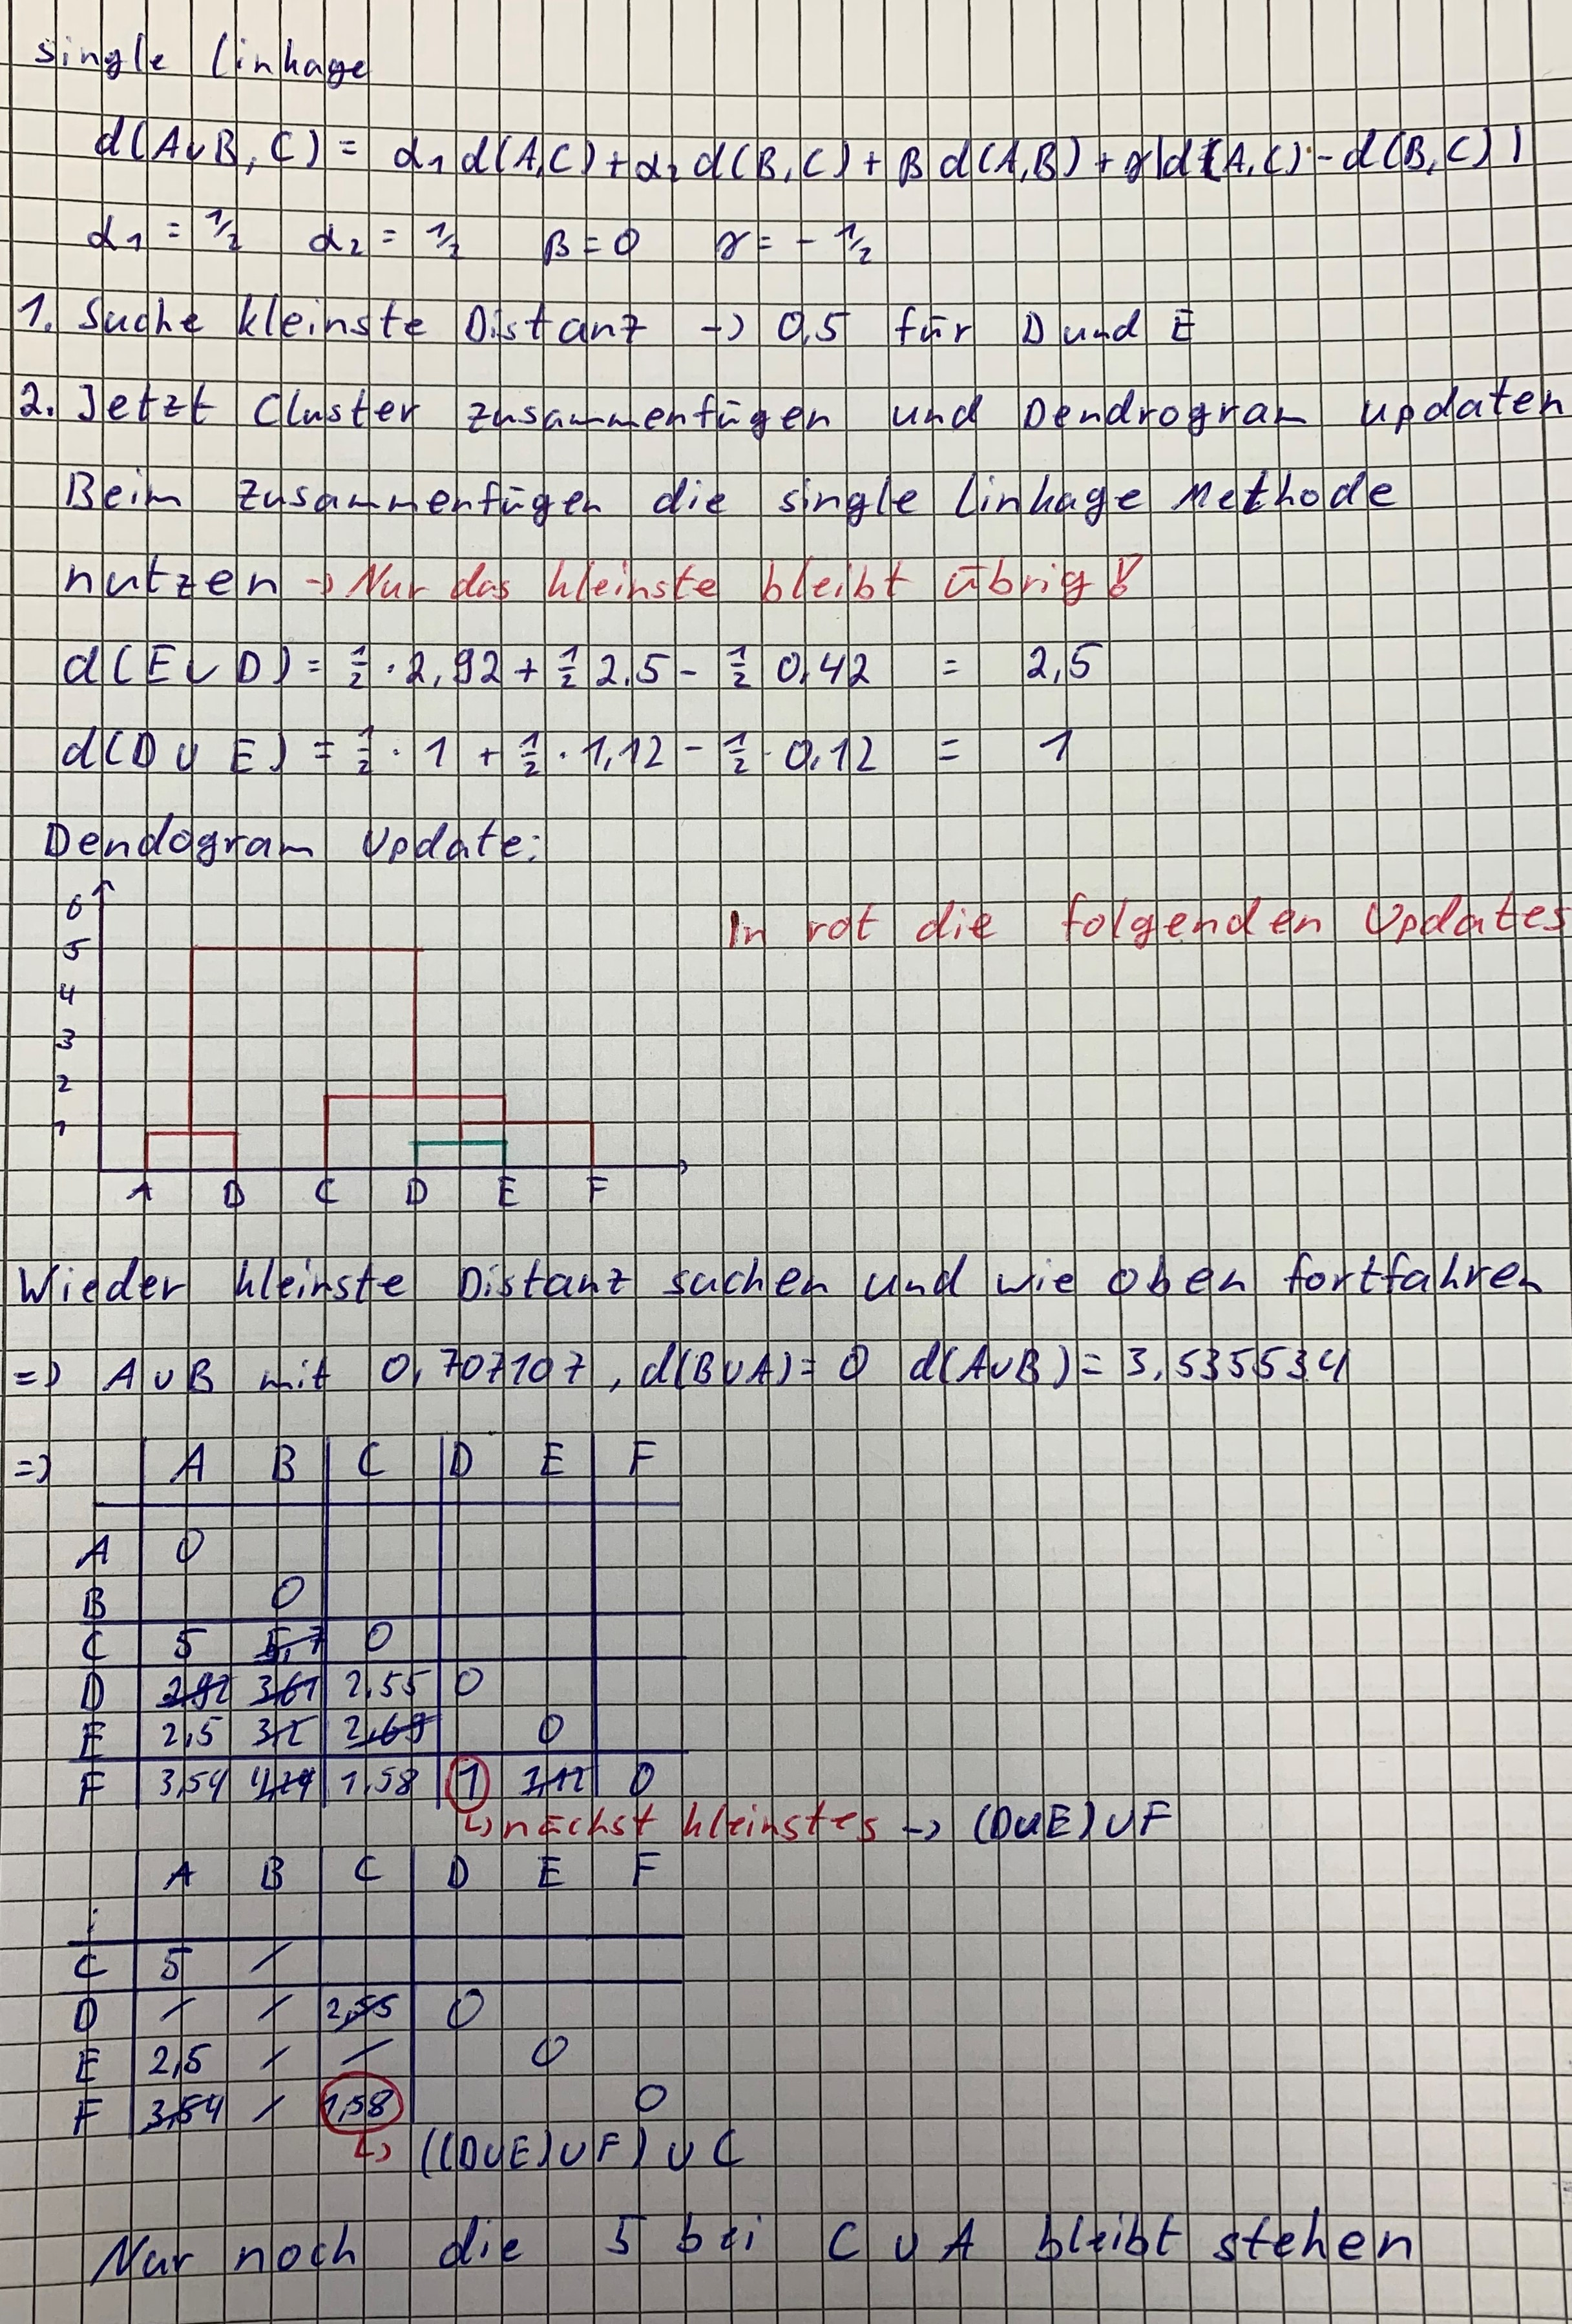

#### TODO

b) What is the worst-case runtime of Hierarchical Agglomerative Clustering and what is the runtime of AGNES?

#### TODO

c) Give an algorithm in pseudocode to draw the Dendrogram.

min = min(distMat)

argMin = argmin(distMat)

line at argMin[0] from 0 to min and same for argMin[1]

connect points (argMin[0],min) and (argMin[1],min)

for x in range(len(distMat)):
    
    distMat[argMin[0]][x] = 

#### TODO

# Implementing AGNES

Implement AGNES for clustering the iris data set with complete linkage by completing the steps a)-i) below.

First load the iris data set and compute a distance matrix using:

In [ ]:
import sklearn.datasets, sklearn.metrics.pairwise
iris = sklearn.datasets.load_iris().data
mat = sklearn.metrics.pairwise.euclidean_distances(iris)

The **required** output format is a matrix of size $n-1 \times 4$, containing one row for each merge.

In each row, the first and second columns give the child clusters.
The third column is the merge height, and the fourth column is the cluster size:
$$\text{row}_{i-n} = (\text{Cluster number }k, \text{Cluster number }l, \text{Height}, \text{Size})$$
Cluster numbers $0\leq k, l < n$ correspond to the one-element clusters representating the original data points, whereas an index $n+i$ with $0\leq i < n-1$ indicates the cluster resulting from the $i$th merge.

Obviously, row $i$ must only reference earlier clusters numbers $k,l < i + n$.

If you have trouble with the output format, it is also explained at:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

a) Understand the output format.

Review the clustering example on the slides.

The first lines of this output format for the lecture example are:

$[3, 4, 0.5, 2]\\
[0, 1, 0.71, 2]\\
[6, 5, 1.12, 3]$

What is the next line?

#### TODO

b) Is the output uniquely defined? Explain your answer.

#### TODO

c) Choose appropriate data structures to store your internal state during the clustering.

Explain the structures you chose briefly.

#### TODO

d) Implement a function `find_minimum` that returns the minimum of the *remaining* distances.

In [ ]:
def find_minimum(mat):
    # TODO

e) Implement a function `update_matrix` to update your distance matrix.

In [ ]:
def update_matrix(mat, k, l):
    # TODO

f) Implement the hierarchical clustering process.

In [ ]:
def hierarchical_clustering(data, mat):
    # TODO

g) Print the first 5 rows of the linkage matrix when clustering the iris data.

In [ ]:
# TODO

h) Visualize your output using the scipy `dendrogram` method.

In [ ]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
dendrogram(linkage)
plt.show()

i) Compare your output to that of `scipy.cluster.hierarchy.linkage`.

Beware that this function expects a different input format (see the documentation),
and the resulting dendrogram will be similar, but most likely have a different ordering.

In [ ]:
from scipy.cluster.hierarchy import linkage
# TODO